## 1. Preparation

In [34]:
import pandas as pd
import kagglehub 
import matplotlib.pyplot as plt
import os
import plotly.express as px

In [35]:
# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [36]:
all_files = os.listdir('/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1')
for file in all_files:
    print(file)

sales_data_sample.csv


In [37]:
raw = pd.read_csv(
    '/home/gitpod/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1/sales_data_sample.csv',
    encoding='latin1'
)

## 2. Explore the data

In [38]:
# Drop unnecessary columns

to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE','TERRITORY','PHONE','CONTACTLASTNAME','CONTACTFIRSTNAME']
raw = raw.drop(to_drop, axis = 1)

In [39]:
# Change data type of ORDERDATE to datetime type

raw['ORDERDATE'] = pd.to_datetime(raw['ORDERDATE'])

In [40]:
# Summary stats of Quantitative variables

quantitive_vars = ['QUANTITYORDERED','PRICEEACH', 'SALES','MSRP']
describe_quantitive_vars = raw[quantitive_vars].describe()
describe_quantitive_vars.style.background_gradient(cmap = "Blues")

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


## 3. Analyze and Visualize Data

In [50]:
pastel_colors = [
    "#FFB5A7",  # Coral Blush
    "#FCD5CE",  # Peony Pink
    "#F8E1D4",  # Apricot Cream
    "#A5A58D",  # Olive Sage
    "#B5E2FA",  # Sky Mist
    "#99C1B9",  # Mint Grey
    "#E4C1F9",  # Lavender Frost
    "#CBAACB",  # Soft Lilac
    "#FFFFB5",  # Butter Yellow
    "#FFC8DD",  # Rosy Cotton
    "#D8E2DC",  # Feather White
    "#A9DEF9",  # Cool Ice Blue
    "#EDE0D4",  # Oatmilk Beige
    "#DAD7CD",  # Mossy Neutral
    "#BFD8B8",  # Celery Toned
    "#C6DEF1",  # Baby Blue Grey
    "#FFDAC1",  # Peach Puff
    "#F9C6C9",  # Petal Pink
    "#ECD5E3",  # Mauve Mist
    "#C3F0CA",  # Pastel Mint
]

### 3.1. Annual Revenue

In [42]:
# Annual Revenue
annual_revenue = pd.DataFrame(raw.groupby(['YEAR_ID'])['SALES'].sum()).reset_index()
annual_revenue.style.background_gradient(cmap = "Blues")

,YEAR_ID,SALES
0,2003,3516979.540000
1,2004,4724162.600000
2,2005,1791486.710000


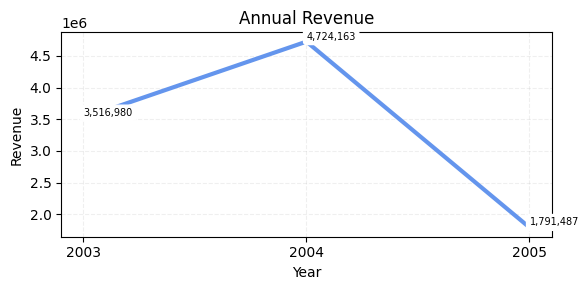

In [43]:
# Plot Chart for Annual Revenue
fig, ax = plt.subplots(figsize=(6, 3))

year = annual_revenue['YEAR_ID'].tolist()
sales = annual_revenue['SALES'].tolist()

plt.plot(
    year, #
    sales, 
    color="#6495ED",
    linewidth = 3
)

for x, y in zip(year, sales):
    plt.text(
        x, y , f'{y:,.0f}', 
        ha='left', 
        va='bottom', 
        fontsize=7,
        bbox=dict(facecolor='white', edgecolor='white', boxstyle='round')
                 )
    
plt.title("Annual Revenue")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.xticks(year)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()


# matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)

### 3.2. Monthly Revenue

In [44]:
# Monthly Revenue
monthly_revenue = pd.DataFrame(raw.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum()).reset_index()

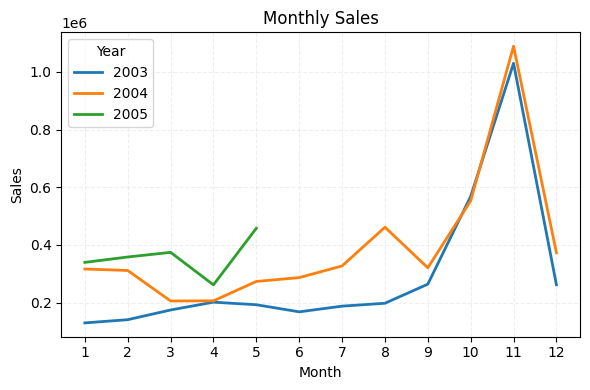

In [45]:

fig, ax = plt.subplots(figsize = (6,4))

for year in monthly_revenue['YEAR_ID'].unique():
    yearly_data = monthly_revenue[monthly_revenue['YEAR_ID'] == year]
    plt.plot(
        yearly_data['MONTH_ID'], 
        yearly_data['SALES'], 
        label=str(year),
        linewidth = 2
    )

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13)) 
plt.legend(title='Year')
plt.grid(True, linestyle = '--', alpha = 0.2)
plt.tight_layout()

plt.show()

### 3.3. Sales by Country

In [92]:
sales_by_country = pd.DataFrame(raw.groupby(['COUNTRY'])['SALES'].sum()).reset_index()
sales_by_country = sales_by_country.sort_values(by = "SALES", ascending = False)

In [94]:
sales_by_country.reset_index(inplace=True)

In [100]:
sales_by_country = sales_by_country.drop('index',axis=1)

In [122]:
top_5_idx = sales_by_country["SALES"].nlargest(5).index

In [134]:
def custom_autopct(pct, allvals):
    total = sum(allvals)
    val = int(round(pct * total / 100.0))
    if val in top_5_vals:
        return f'{pct:.1f}%'
    else:
        return ''


In [136]:
labels = []
for i in range (0,5):
    country = sales_by_country["COUNTRY"][i]
    labels.append(country)
for i in range (5,


In [141]:
len(sales_by_country["COUNTRY"])

19

In [137]:
labels

['USA', 'Spain', 'France', 'Australia', 'UK']

In [124]:
sales = list(sales_by_country["SALES"])
top_5_vals = list(sales_by_country.loc[top_5_idx, "SALES"])

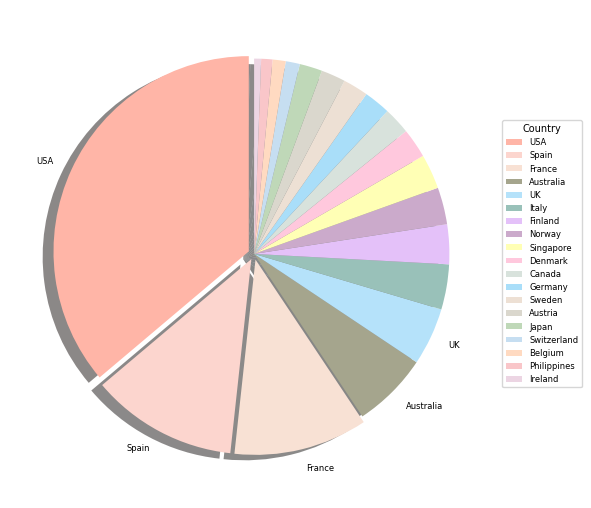

In [125]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(
    sales,
    labels=labels,
    colors=pastel_colors,
    startangle=90,
    textprops={'fontsize': 6},
    autopct=lambda pct: custom_autopct(pct, sales),
    pctdistance=0.8,
    explode=explode,
    shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}
)

plt.legend(
    wedges,
    sales_by_country["COUNTRY"],
    title="Country",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=6,
    title_fontsize=7
)

plt.tight_layout()
plt.show()
